# Problem Set 2

# Exercise 1: Do Microfinance Loans Affect Expenditure?

Most of the world's poor have limited access to formal credit. Traditionally, they have had to resort to their social networks (family, friends) or local moneylenders that charge exorbitant interest rates (upwardsof 100%). This often prevents individuals from making investments in potential businesses or productive assets. In the last 15 years, microfinance institutions (MFI) have emerged all across the developing world to address this problem. The basic model of a microfinance institution (such as the Grameen Bank) is to provide small loans to a group of potential borrowers at much lower interest rates. The number of very poor families with a microloan has grown exponentially: from 7.6 million in 1997 to 137.5 million in 2010. Micro-credit has been heralded as a major advance in the reduction of global poverty. However, in recent years, critiques have emerged accusing micro-finance institutions of acting irresponsibly by holding the poor to very strict repayment schedules and charging unreasonably high interest rates. So where does this leave us? Does micro-credit help or hinder? In the January 2015 issue of the American Economic Journal: Applied Economics, six papers evaluating the merits of micro-credit were released. We will explore the results from one of these papers by Augsburg et al., which evaluates a microfinance institution in Bosnia and Herzegovina.

## Data Description
The data for this exercise comes from a study conducted in Bosnia and Herzegovina investigating the effects of a small loan on access to liquidity, self-employment, income, labor supply, expenditure, and savings. These were individual-liability loans with monthly repayments and an interest rate of 22%. The sample consists of potential borrowers (who were just marginally eligible for loans). Approximately half the sample was randomly selected to receive the loan (the treatment group), while the other half did not receive anything (control group). You have a subsample of individuals (both in the treatment and control group) that the researchers used for their analysis. The respondent (= the loan applicant) answered questions about the household they belonged to as well as about their loand and personal outcomes (no two respondents are from the same household). The PS2_MFI.dta file includes the following variables (along with some others we will not ask you to analyze):

• `treatment` : dummy equal to 1 if the respondent is in the treatment group (which received a loan)

• `resp_female`: dummy equal to 1 if the respondent is female

• `resp_age`: the respondent's age

• `hhmem`: number of household members

• `hhmem_adults`: number of adults in household ($\geq$ 14)

• `hhmem_children`: number of children in household (<14)

• `hhmem_elderly`: number of elderly in household (>64)

• `total_exp`: total annual household expenditure in Bosnian Convertible Marka (BAM)

• `food_exp`: annual household expenditure on food in BAM

• `nondur_exp`: annual household expenditure on nondurables (rent, fuel, transport, clothes, insurance...) in BAM

• `dur_exp`: annual household expenditure on durables (education, furniture, vehicle...) in BAM

• `temp_exp`: annual household expenditure on temptation goods (cigarettes, tobacco, alcohol) in BAM

The prevailing exchange rate at the time of the study was approximately US$1 = 1.63 BAM.

## Question 1

Load the dataset `PS2_MFI.dta`. Notice that this is a `.dta` file so you will need to use the `haven` package.

In [15]:
library(haven) 
data <- read_dta('PS2_MFI.dta') 
head(data)

intervid,treatment,resp_female,resp_primary,resp_secondary,resp_tertiary,resp_noschool,resp_age,resp_married,resp_emp,⋯,hhmem_unemployed,hhmem_retired,hhmem_school,total_exp,food_exp,nondur_exp,dur_exp,temp_exp,savings_avg,followup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,0,0,0,29,0,0,⋯,1,0,2,5740,2080,960,1400,1300,0,1
4,0,0,0,0,1,0,49,0,0,⋯,2,0,2,34678,30160,4488,30,0,500,1
6,0,0,1,0,0,0,24,1,1,⋯,0,0,0,9180,2600,420,4340,1820,0,1
7,0,0,0,1,0,0,45,0,1,⋯,0,0,0,12696,9360,1812,900,624,0,1
8,1,0,1,0,0,0,52,0,1,⋯,0,0,2,2960,2600,360,0,0,0,1
13,1,0,0,1,0,0,18,1,1,⋯,0,0,1,9188,7800,360,300,728,500,1


### a) How many respondents are in your data set? How many respondents are unmarried? What is the mean age among the respondents in the sample? What is the mean number of children in respondents' households in your sample?
Note there are some missing values of respondents' age. What argument do you have to add to `mean()` to get around this?

Hint: check for the `mean()` syntax in this website: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/mean .

In [2]:
respondents <- nrow(data)
sprintf("How many people are in the Data set : %f", respondents)
unmarried <- sum(data$resp_married != 1)
sprintf("How many people are unmarried : %f", unmarried)
mean_age <- (data$resp_age)
sprintf("Average age : %f", mean(mean_age, na.rm=TRUE))
number_child <- (data$hhmem_children)
sprintf("Average number of childrens : %f", mean(number_child, na.rm=TRUE))

[1] "How many people are in the Data set : 541.000000"

[1] "How many people are unmarried : 423.000000"

[1] "Average age : 37.479630"

[1] "Average number of childrens : 0.878004"

1. Number of people in this data sets in 541 people.
2. Number of people that are unmarried are 423.
3. The mean age of the dataset is 37.4796.
4. The average number of children per household is 0.878.

### b) Construct a variable `total_exp_pc` equal to total expenditures per capita in BAM. Plot a histogram (Hint: use the `hist()` command) of this constructed variable. What is the range of household total expenditures per capita? (You may want to refer to US Dollars in the discussion, so as to make sense of the income level of these MFI clients).

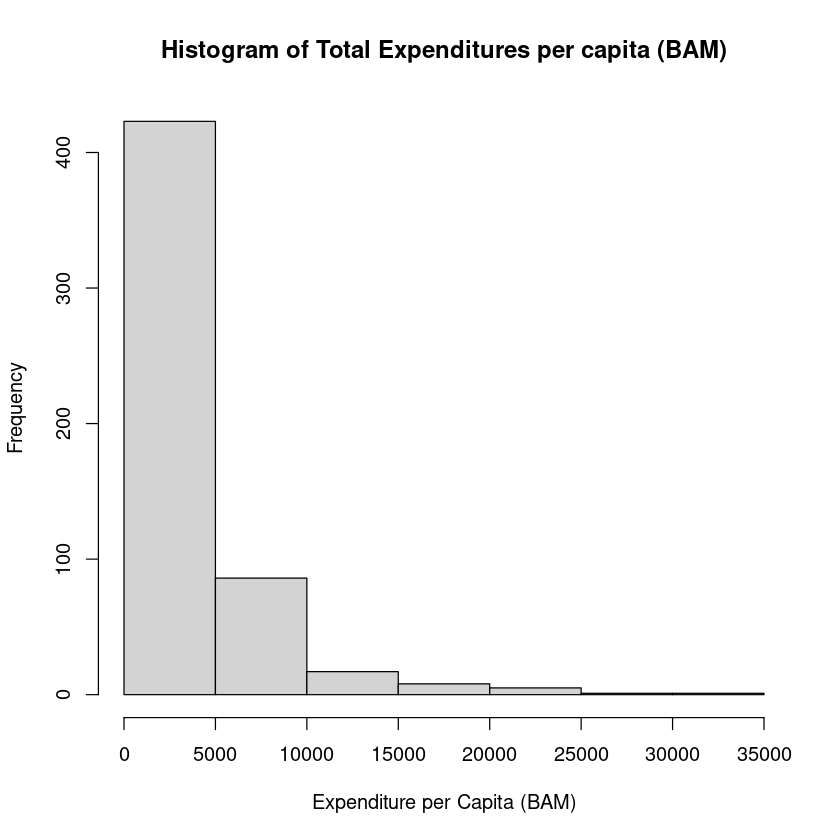

In [14]:
library(tidyverse)
data <- data %>% mutate(total_exp_pc = data$total_exp/data$hhmem)
hist(data$total_exp_pc,
    main = "Histogram of Total Expenditures per capita (BAM)",
    xlab = "Expenditure per Capita (BAM)")

This shows us that on average, they are spending less than 5000 dollars yearly per person.The mean showed that total expenditure annually was 3955.92 dollars and lowest was 421 dollars per year, which is extremely poor, then we had highest at 32498, 10x the average total expenditure per year.

### c) Calculate the proportion of household expenditures spent on "temptation" goods (cigarettes, alcohol, etc.). You will need to create this new variable. What is the mean? What is the median? Compare the mean value of these proportions among treatment and control households. Print the mean for each group, as well as the difference in means between treatment and control households.

In [4]:
data <- data %>% mutate(temptation = temp_exp/total_exp)
sprintf("Mean main Data : %f", mean(data$temptation))
sprintf("Median main Data : %f", median(data$temptation))

treatement_group <- data[data$treatment == "1",]
controlled_group <- data[data$treatment == "0",]

mean_treatment <- mean(treatement_group$temptation)
median_treatment <- median(treatement_group$temptation)
mean_controlled <- mean(controlled_group$temptation)
median_controlled <- median(controlled_group$temptation)

sprintf("Mean treatment : %f", mean_treatment)
sprintf("Median Treatment : %f", median_treatment)
sprintf("Mean controlled : %f", mean_controlled)
sprintf("Median controlled : %f", median_controlled)

difference <- mean_treatment - mean_controlled
sprintf("Difference : %f", difference)

[1] "Mean main Data : 0.072825"

[1] "Median main Data : 0.054209"

[1] "Mean treatment : 0.069910"

[1] "Median Treatment : 0.051661"

[1] "Mean controlled : 0.076454"

[1] "Median controlled : 0.055954"

[1] "Difference : -0.006544"

1. The mean from the whole Data set on expenditures on temptations good is 0.0728.
2. The median from the whole Data set on expenditures on temptations good is 0.0542.
3. The mean from the Treatment group spending on expenditures on temptations good is 0.0699.
4. The median from the Treatment group spending on exentires on temptations good is 0.05.
5. The mean from the controleld group spending on expenditures on temptations good is 0.076454
6. The median from the controlled group spending on exentires on temptations good is 0.055954.
7. The difference between controlled and temptations is  -0.006544. 

## Question 2

We will now explore the role of household size in food consumption. Consider these two models: 

Model (1): $\ln($food_exp_pc$) = \beta_0 + \beta_1 \ln($nondur_exp_pc$) + \beta_2 treatment+ u$

Model (2): $\ln($food_exp_pc$) = \beta_0 + \beta_1 \ln($nondur_exp_pc$) + \beta_2 treatment + \beta_3 \ln(hhmem) + u$

### a) Estimate equations (1) and (2). Print the regression outputs for both regressions.

In [5]:
data <- data %>% mutate(food_exp_pc = data$food_exp/data$hhmem)
data <- data %>% mutate(nondur_exp_pc = data$nondur_exp/data$hhmem)
head(data)
slr1 <- lm(log(food_exp_pc) ~ log(nondur_exp_pc) + treatment, data=data) 
summary(slr1)
slr2 <- lm(log(food_exp_pc) ~ log(nondur_exp_pc) + treatment + log(hhmem), data=data) 
summary(slr2)

intervid,treatment,resp_female,resp_primary,resp_secondary,resp_tertiary,resp_noschool,resp_age,resp_married,resp_emp,⋯,food_exp,nondur_exp,dur_exp,temp_exp,savings_avg,followup,total_exp_pc,temptation,food_exp_pc,nondur_exp_pc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,0,0,0,29,0,0,⋯,2080,960,1400,1300,0,1,1148.0,0.22648084,416,192
4,0,0,0,0,1,0,49,0,0,⋯,30160,4488,30,0,500,1,8669.5,0.00000000,7540,1122
6,0,0,1,0,0,0,24,1,1,⋯,2600,420,4340,1820,0,1,9180.0,0.19825708,2600,420
7,0,0,0,1,0,0,45,0,1,⋯,9360,1812,900,624,0,1,12696.0,0.04914934,9360,1812
8,1,0,1,0,0,0,52,0,1,⋯,2600,360,0,0,0,1,740.0,0.00000000,650,90
13,1,0,0,1,0,0,18,1,1,⋯,7800,360,300,728,500,1,1837.6,0.07923378,1560,72



Call:
lm(formula = log(food_exp_pc) ~ log(nondur_exp_pc) + treatment, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.07357 -0.47485  0.02692  0.47206  2.10871 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.81272    0.15937   36.47   <2e-16 ***
log(nondur_exp_pc)  0.25838    0.02481   10.41   <2e-16 ***
treatment          -0.10899    0.06088   -1.79    0.074 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.703 on 538 degrees of freedom
Multiple R-squared:  0.1746,	Adjusted R-squared:  0.1715 
F-statistic:  56.9 on 2 and 538 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(food_exp_pc) ~ log(nondur_exp_pc) + treatment + 
    log(hhmem), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.05055 -0.41227  0.02881  0.42868  2.23038 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.01344    0.18594  37.718  < 2e-16 ***
log(nondur_exp_pc)  0.17711    0.02398   7.387 5.79e-13 ***
treatment          -0.09111    0.05564  -1.637    0.102    
log(hhmem)         -0.60570    0.05835 -10.380  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6421 on 537 degrees of freedom
Multiple R-squared:  0.3125,	Adjusted R-squared:  0.3087 
F-statistic: 81.38 on 3 and 537 DF,  p-value: < 2.2e-16


### b) Interpret each of the estimated parameters of equation (2) - remember to include significance. 

### The results you are finding on the role of household size may a priori seem suprising. Try to think about a scenario where two households of the same size, with the same treatment status and per capita expenditures on nondurable goods, decide to move in together. What does your estimation predict about food consumption per capita?

The beta0 from equation 2, is 7.0134, which is the predicted value of food expenditures per capita when every value is held at 0.

Beta1 is 0.177, which means for every single value added onto beta0 would be an increase by 1.7%, this is significant(1%). 

Beta2 is negative, so this means every unit of treatment is a decrease to the total food expdnetiure per capita by 9.1% is signficant as well. 

Beta3 here is also negative, so every one unit added of number of households would decrease the food expenditure by -0.60, is significant.

If two households of the same size, with the same treatment status and per capita expenditures on nondurable goods, decide to move in, our model predicts  that it would decrease the food expenditure. 


### c) How did your estimate of $\hat{\beta}_1$ change between equation (1) and equation (2)? Without performing any calculations, what information does this give you about the correlation between expenditure per capita on nondurable goods and household size? (Explain your reasoning in no more than 4 sentences.)

There is a difference between the beta1 in equation 1 and equation 2 by 0.08127. One observations is that there is some type of ommited varaible present between equation 1 and equation 2, in equation 2 you can clearly see the beta0 value increase and have negative value from beta3, showing that there is negative correlation between non durable expenditures and household size.

### d) Predict the expected value of food expenditure per capita of a treatment household with 3 members and per capita expenditures on nondurable goods of BAM 1000 using your estimates from equation (2).

In [6]:
exp(7.01344 + (log(1000)) *0.17711 + -0.09111*(1) + (log(3)*-0.605))

[1] 1774.195

Our model predicts 1774.19 BAM given the expected value of food expenditure between 3 members, and per capita expenditures on nondurable good fors 1000 BAM. 

## Question 3

A country's dependency ratio is the ratio of old and young dependents (dependents are those not in the labor force) to the working-age population. A similar measure could be constructed for the household: 

$hhdr =\frac{\text{hh members under 14 or over 64}} {\text{hh members aged 14 to 64}}$ 

Model 2 (as well as Model 1) does not capture how the composition of a household, i.e. the characteristics of the members, is associated with food consumption per capita. You suspect that the structure of the family affects food expenditure per capita controlling for the log of household size and the log of expenditure per capita on nondurable goods (think about how children and older people might consume less food than adults; and how larger households might have more children). Specifically you hypothesize that a higher dependency ratio is associated with lower food expenditure per capita, holding other factors constant. 

### (a) Write an equation you could estimate that would allow you to test this hypothesis.

Hypthoesis, the higher the HHDR is, the lower food expedniture we expect because you have less people working and more people eating.

Equation --> $\ln($food_exp_pc$) = \beta_0 + \beta_1 \ln($nondur_exp_pc$) +  + \beta_2 \ln(hhmem) +  \beta_3 hhdr + u$'

H0: beta3 equals 0

### (b) Estimate the equation in part (a). Print the regression output. What can you conclude about the hypothesis? 
Note that some households don't have members aged 14 to 64, which means that their $hhdr$ would be undefined. Replace $hhdr$ with NA for these observations. 

Hint: The following website has some simple examples showing you how to replace variables with conditions in R: https://statisticsglobe.com/replace-values-in-data-frame-conditionally-in-r .

In [7]:
data$hhmem_adults [data$hhmem_adults  == 0] <- NA
data <- data %>% mutate(HHDR = (data$hhmem_children + data$hhmem_elderly)/(data$hhmem_adults),na.rm=TRUE)
head(data)
slr3<-lm(log(food_exp_pc) ~ log(nondur_exp_pc) + log(hhmem) + HHDR, data=data)
summary(slr3)

intervid,treatment,resp_female,resp_primary,resp_secondary,resp_tertiary,resp_noschool,resp_age,resp_married,resp_emp,⋯,dur_exp,temp_exp,savings_avg,followup,total_exp_pc,temptation,food_exp_pc,nondur_exp_pc,HHDR,na.rm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
2,1,1,1,0,0,0,29,0,0,⋯,1400,1300,0,1,1148.0,0.22648084,416,192,1.5000000,TRUE
4,0,0,0,0,1,0,49,0,0,⋯,30,0,500,1,8669.5,0.00000000,7540,1122,0.3333333,TRUE
6,0,0,1,0,0,0,24,1,1,⋯,4340,1820,0,1,9180.0,0.19825708,2600,420,0.0000000,TRUE
7,0,0,0,1,0,0,45,0,1,⋯,900,624,0,1,12696.0,0.04914934,9360,1812,0.0000000,TRUE
8,1,0,1,0,0,0,52,0,1,⋯,0,0,0,1,740.0,0.00000000,650,90,1.0000000,TRUE
13,1,0,0,1,0,0,18,1,1,⋯,300,728,500,1,1837.6,0.07923378,1560,72,0.6666667,TRUE



Call:
lm(formula = log(food_exp_pc) ~ log(nondur_exp_pc) + log(hhmem) + 
    HHDR, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.09576 -0.40261  0.00802  0.43718  2.28417 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.95273    0.18446  37.693  < 2e-16 ***
log(nondur_exp_pc)  0.17930    0.02416   7.421 4.58e-13 ***
log(hhmem)         -0.61597    0.06371  -9.669  < 2e-16 ***
HHDR                0.02110    0.06686   0.316    0.752    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6443 on 536 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3081,	Adjusted R-squared:  0.3042 
F-statistic: 79.57 on 3 and 536 DF,  p-value: < 2.2e-16


we seem to have gotten the negative of our hpyothesis, we would reject our hpyothesis on the idea that higher the HHDR is the lower food consumption but it seems to be the opposite somehow, it has postive beta3, meaning every added value of HHDR is increasing, which makes no sense. (did something wrong probably).

# Exercise 2: Perceptions of Global Warming

Gallup Polling collects information about a variety of topics ( health, environment, political attitudes, education). In March 2018, Gallup conducted a poll to gather information about the perceived onset of global warming among Californian voters. Question: "Do you believe that global warming is caused by human activities?"

|  Group      | Number of Observations  | Yes |
|-------------|-------------------------|-----|
|  All voters |  1408                   | 697 |
| Republicans |  482                    | 133 |  
| Democrats   |  521                    | 375 | 
| Independents|  405                    | 189 |


Consider first the overall result (all voters). Let $p$ be the fraction of all voters in California (the population of interest) that believe that global warming is caused by human activities.

 Note: You answer to the following questions should not necessarily require any R code (unless you would like to use R as a calculator). Some of your answers will require that you type in equations. LaTeX is a typsetting language that makes nicely formatted equations. At the beginning and end of an equation you will need to type a $\$$  to tell Jupyter that you are typing a Latex equation. The following website has some simple examples showing you how to format your equations in Latex:  http://www.personal.ceu.hu/tex/cookbook.html . 

### (a) Use the survey results to estimate $p$ for the whole population. Print $p$.

In [8]:
phat<- (697/1408)
phat

[1] 0.4950284

Our p estimation of the who population shows that only 49% people believe in global warming that are caused by human activities.

### (b) Construct a 95% confidence interval for $p$. Interpret.

In [13]:
square_value <- sqrt((phat*(1-phat))/1408)
square_value
CI_left <- phat-(1.96)*square_value
CI_right <- phat+(1.96)*square_value
c(CI_left,CI_right)

[1] 0.01332439

[1] 0.4689126 0.5211442

Our constructed inverval for 95% shows that if you collect a sample randomly, we expect the values or percentage of people to believe that human acitives causes global warming to be between 46% and 52%.

### (c) Suppose you want to test the null hypothesis that the fraction of voters who believe that global warming is caused by human activities is the same among Democrats and Republicans against the alternative hypothesis that the fraction of voters who believe that global warming is caused by human activities is higher among Democrats than Republicans. Write down the null and alternative hypotheses. Is this a one-sided or two-sided test?

H0:phatDemocrates - phatRepublicans = 0  
The null hypthesis here would be that you take phat value of democrates and subract it from phat value of repbulicans and expect zero.

H1: phatDemocrates - phatRepublicans > 0   
Alternative is that phatr-phatd is not equal to zero, there is signfincance difference(greater than 0).

This is a one tail test

### (d) Generate a test statistic which will allow you to test the hypotheses in part (c), and identify a critical value which will give you 99% confidence. Print the test statistic and the critical value.

In [2]:
pdemo <- (375/521) 
prepo <- (133/482)
difference <- pdemo - prepo
difference
p_hat_v <- (482/1003)*(prepo) + (521/1003)*(pdemo)
p_hat_v
se <- sqrt((p_hat_v*(1-p_hat_v)/521)+(p_hat_v*(1-p_hat_v)/482))
se
z <- (difference - 0)/se
z
critical_value <- 2.3
critical_value

[1] 0.4438361

[1] 0.5064806

[1] 0.03159669

[1] 14.04692

[1] 2.3

### (e) Implement your test and interpret your results.

1.We reject if |T| > |C|, since we have 14.6 > 2.3, so we reject the null hypthoesis.
2.We reject the null hpyothesis. That there is statistical evidence that voters believe global warming is caused by humans acitivites is higher among democrats when compared to republicans. 